In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import random
import tensorflow as tf
import cv2
import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import  ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU
from tensorflow.keras import backend
backend.clear_session()
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import losses, optimizers
from google.colab.patches import cv2_imshow
from PIL import Image
from tensorflow.keras.preprocessing import image

In [ ]:
#ls /content/drive/MyDrive/deep_9/

ls: cannot access '/content/drive/MyDrive/deep_9/': No such file or directory


In [ ]:
!unzip "/content/drive/MyDrive/deep_9.zip"

Archive:  /content/drive/MyDrive/deep_9.zip
   creating: deep_9/
   creating: deep_9/Testing/
   creating: deep_9/Testing/cups/
  inflating: deep_9/Testing/cups/08-22-29-864428.png  
  inflating: deep_9/Testing/cups/08-22-03-834422.png  
  inflating: deep_9/Testing/cups/08-13-39-782450.png  
  inflating: deep_9/Testing/cups/08-13-50-310346.png  
  inflating: deep_9/Testing/cups/08-17-56-374835.png  
  inflating: deep_9/Testing/cups/08-24-56-706689.png  
  inflating: deep_9/Testing/cups/08-25-26-000451.png  
  inflating: deep_9/Testing/cups/08-14-58-017914.png  
  inflating: deep_9/Testing/cups/08-18-02-409890.png  
  inflating: deep_9/Testing/cups/08-16-50-424364.png  
  inflating: deep_9/Testing/cups/08-24-54-023299.png  
  inflating: deep_9/Testing/cups/08-18-06-985789.png  
  inflating: deep_9/Testing/cups/08-25-37-914114.png  
  inflating: deep_9/Testing/cups/08-14-13-429721.png  
  inflating: deep_9/Testing/cups/08-16-09-806548.png  
  inflating: deep_9/Testing/cups/08-22-54-99811

In [ ]:
np.random.seed(1)

In [ ]:
DATADIR = "/content/deep_9/Training"                                             # Path of training data after unzipping
CATEGORIES = ["coins","cups","cutlery","faces","gestures","glasses","nail_polishes","pens","plants","plates","shoes","smartphones"]  # Storing all the categories in categories variable
IMG_SIZE=28

In [ ]:
# Here we will be using a user defined function create_training_data() to extract the images from the directory
training_data = []                                                             # Storing all the training images
def create_training_data():
    for category in CATEGORIES:                                                # Looping over each category from the CATEGORIES list
        path = os.path.join(DATADIR,category)                                  # Joining images with labels
        class_num = category                                                   
        for img in os.listdir(path):                                           
          img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)  # Converting image to greyscale to reduce the complexity and computation 
          new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))                # Resizing the images 
          training_data.append([new_array,class_num])                          # Appending both the images and labels
create_training_data()

In [ ]:
DATADIR_test = "/content/deep_9/Testing"                                             # Path of training data after unzipping
CATEGORIES = ["coins","cups","cutlery","faces","gestures","glasses","nail_polishes","pens","plants","plates","shoes","smartphones"]  # Storing all the categories in categories variable
IMG_SIZE=28

In [ ]:
testing_data = []

def create_testing_data():                                                     # Storing all the testing images
    for category in CATEGORIES:                                                # Looping over each category from the CATEGORIES list
        path = os.path.join(DATADIR_test,category)                             # Joining images with labels     
        class_num = category
        for img in os.listdir(path):                                           
          img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)  # Converting image to greyscale to reduce the complexity and computation 
          new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))                # Resizing the images
          testing_data.append([new_array,class_num])                           # Appending both the images and labels

create_testing_data()

In [ ]:
# Creating 12 different lists to store the image names for each category by reading them from their respective directories. 
coins_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[0]}') ]        # Looping over the path of each image from the glioma_tumor directory
cups_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[1]}')]     # Looping over the path of each image from the meningioma_tumor directory
cutlery_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[2]}') ]
faces_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[3]}') ]
gestures_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[4]}') ]
glasses_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[5]}') ]
nail_polishes_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[6]}') ]
pens_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[7]}') ]
plants_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[8]}') ]
plates_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[9]}') ]
shoes_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[10]}') ]
smartphones_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[11]}') ]
           # Looping over the path of each image from the no_tumor directory

In [ ]:
# Ranodmly selecting 2 images from each category
select_coins = np.random.choice(coins_imgs, 2, replace = False)               
select_cups = np.random.choice(cups_imgs, 2, replace = False)
select_cutlery = np.random.choice(cutlery_imgs, 2, replace = False)
select_faces = np.random.choice(faces_imgs, 2, replace = False)               
select_gestures = np.random.choice(gestures_imgs, 2, replace = False)
select_glasses = np.random.choice(glasses_imgs, 2, replace = False)
select_nail_polishes = np.random.choice(nail_polishes_imgs, 2, replace = False)               
select_pens = np.random.choice(pens_imgs, 2, replace = False)
select_plants = np.random.choice(plants_imgs, 2, replace = False)
select_plates = np.random.choice(plates_imgs, 2, replace = False)
select_shoes = np.random.choice(shoes_imgs, 2, replace = False)               
select_smartphones = np.random.choice(smartphones_imgs, 2, replace = False)

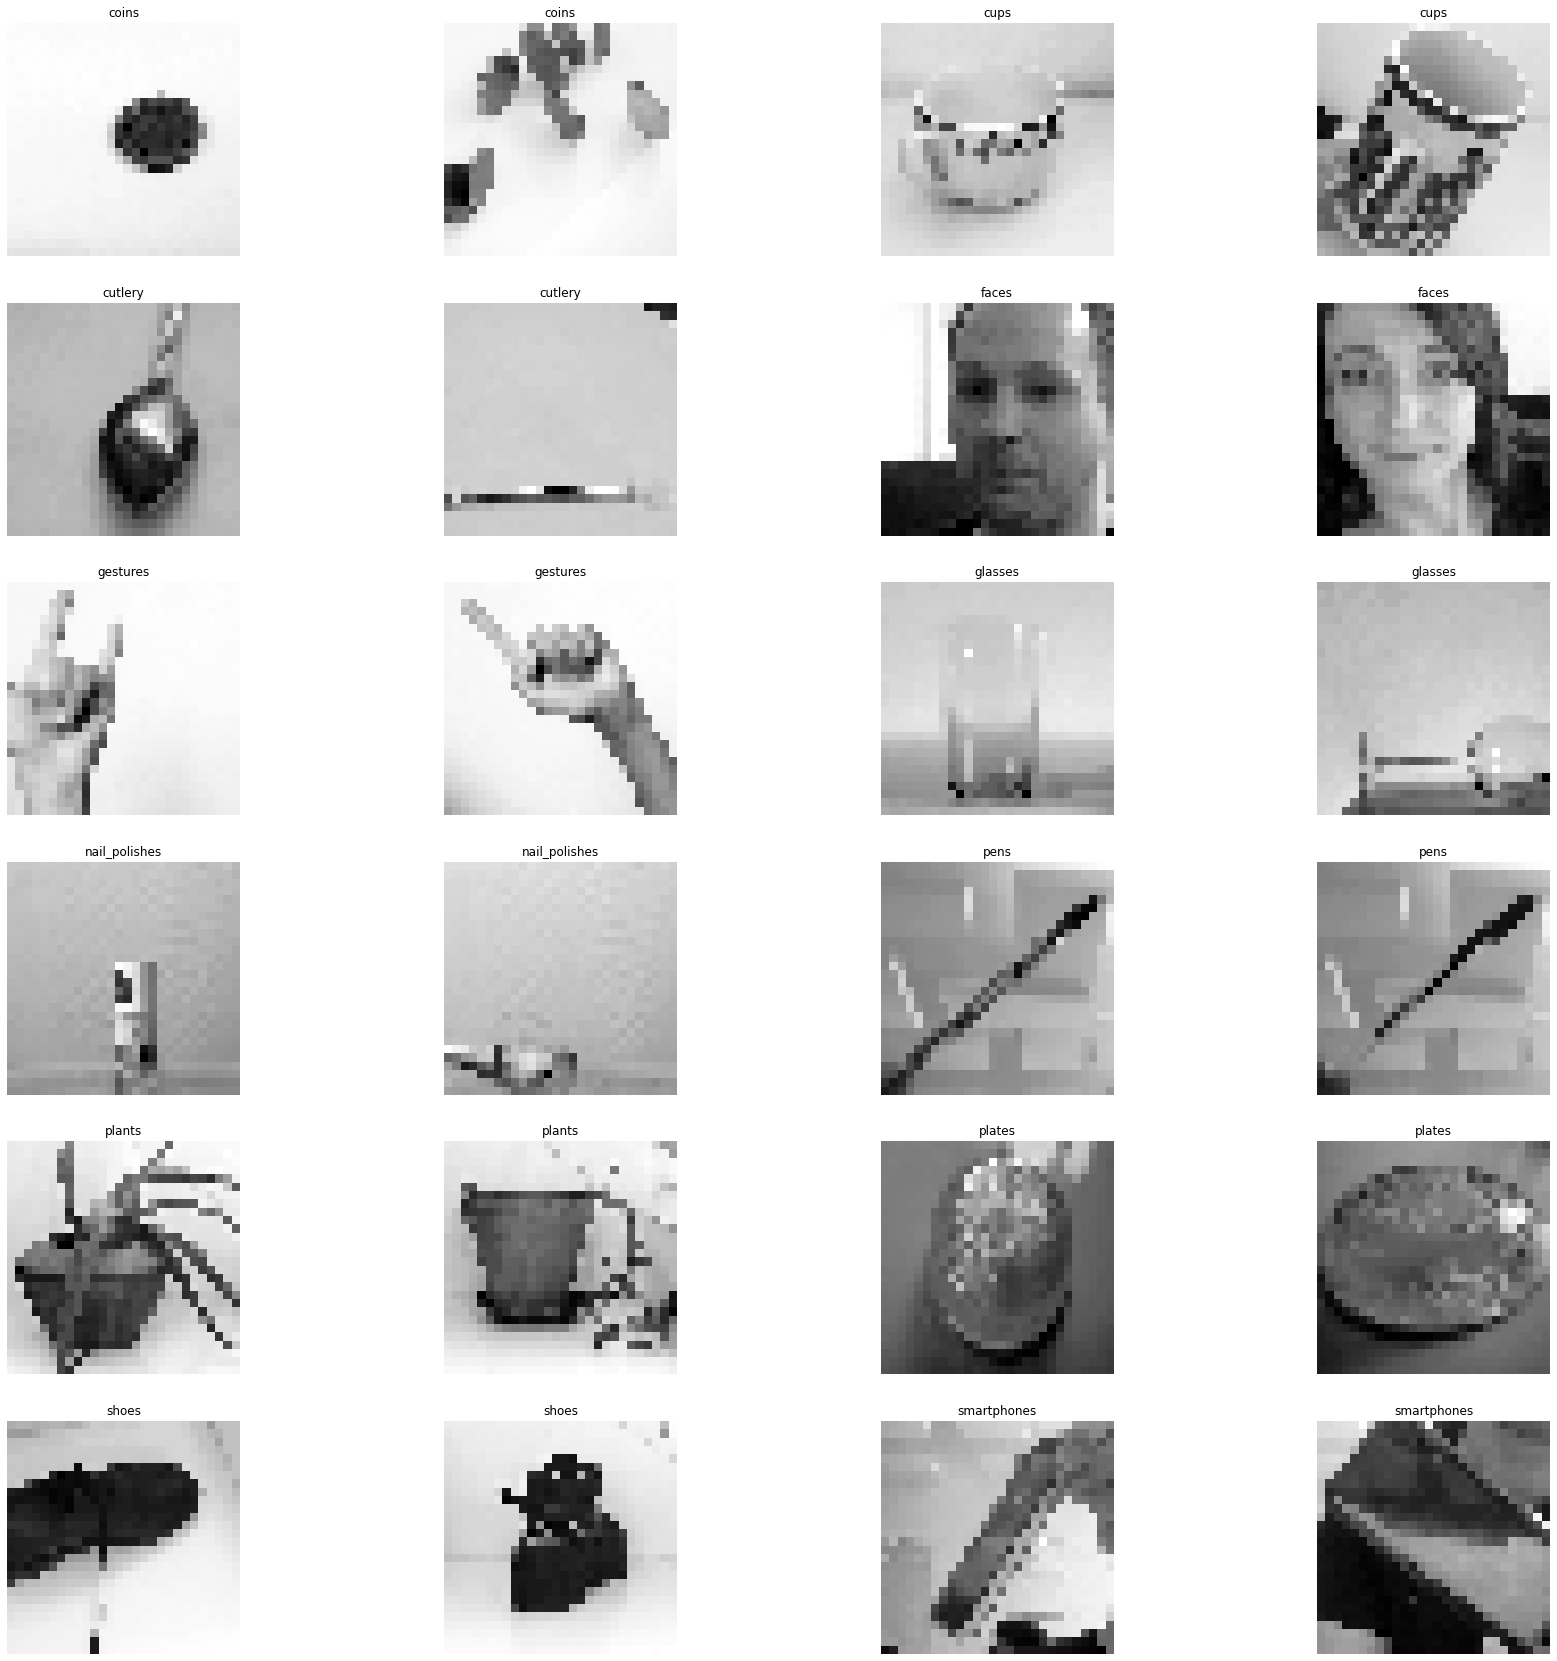

In [ ]:
# plotting 4 x 3 image matrix
fig = plt.figure(figsize = (30, 30))

# Plotting three images from each of the three categories by looping through their path 
for i in range(24):
    if i < 2:
        fp = f'{DATADIR}/{CATEGORIES[0]}/{select_coins[i]}'                      # Here datadir is a path to the training data and categories[0] indicate the first label galioma tumor and here we are looping over to take the three random images that we have stored in select_galo variable 
        label = 'coins'                                                 
    if i>=2 and i<4:
        fp = f'{DATADIR}/{CATEGORIES[1]}/{select_cups[i-2]}'                  # Here datadir is a path to the training data and categories[1] indicate the second label meningioma tumor and here we are looping over to take the three random images that we have stored in select_menin variable 
        label = 'cups' 
    if i>=4 and i<6:
        fp = f'{DATADIR}/{CATEGORIES[2]}/{select_cutlery[i-4]}'                   # Here datadir is a path to the training data and categories[2] indicate the third label no tumor and here we are looping over to take the three random images that we have stored in select_no_t variable 
        label = 'cutlery'
    if i>=6 and i<8:
        fp = f'{DATADIR}/{CATEGORIES[3]}/{select_faces[i-6]}'                   # Here datadir is a path to the training data and categories[2] indicate the third label no tumor and here we are looping over to take the three random images that we have stored in select_no_t variable 
        label = 'faces'
    if i>=8 and i<10:
        fp = f'{DATADIR}/{CATEGORIES[4]}/{select_gestures[i-8]}'                   # Here datadir is a path to the training data and categories[2] indicate the third label no tumor and here we are looping over to take the three random images that we have stored in select_no_t variable 
        label = 'gestures'
    if i>=10 and i<12:
        fp = f'{DATADIR}/{CATEGORIES[5]}/{select_glasses[i-10]}'                   # Here datadir is a path to the training data and categories[2] indicate the third label no tumor and here we are looping over to take the three random images that we have stored in select_no_t variable 
        label = 'glasses'
    if i>=12 and i<14:
        fp = f'{DATADIR}/{CATEGORIES[6]}/{select_nail_polishes[i-12]}'                   # Here datadir is a path to the training data and categories[2] indicate the third label no tumor and here we are looping over to take the three random images that we have stored in select_no_t variable 
        label = 'nail_polishes'
    if i>=14 and i<16:
        fp = f'{DATADIR}/{CATEGORIES[7]}/{select_pens[i-14]}'                   # Here datadir is a path to the training data and categories[2] indicate the third label no tumor and here we are looping over to take the three random images that we have stored in select_no_t variable 
        label = 'pens'
    if i>=16 and i<18:
        fp = f'{DATADIR}/{CATEGORIES[8]}/{select_plants[i-16]}'                   # Here datadir is a path to the training data and categories[2] indicate the third label no tumor and here we are looping over to take the three random images that we have stored in select_no_t variable 
        label = 'plants'
    if i>=18 and i<20:
        fp = f'{DATADIR}/{CATEGORIES[9]}/{select_plates[i-18]}'                   # Here datadir is a path to the training data and categories[2] indicate the third label no tumor and here we are looping over to take the three random images that we have stored in select_no_t variable 
        label = 'plates'
    if i>=20 and i<22:
        fp = f'{DATADIR}/{CATEGORIES[10]}/{select_shoes[i-20]}'                   # Here datadir is a path to the training data and categories[2] indicate the third label no tumor and here we are looping over to take the three random images that we have stored in select_no_t variable 
        label = 'shoes'
    if i>=22 and i<24:
        fp = f'{DATADIR}/{CATEGORIES[11]}/{select_smartphones[i-22]}'                   # Here datadir is a path to the training data and categories[2] indicate the third label no tumor and here we are looping over to take the three random images that we have stored in select_no_t variable 
        label = 'smartphones'
    ax = fig.add_subplot(6, 4, i+1)
        # Plotting each image using load_img function
    fn = image.load_img(fp, target_size = (28,28), color_mode='grayscale')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

In [ ]:
# Creating two different lists to store the Numpy arrays and the corresponding labels
X_train = []                                                                   
y_train = []
np.random.shuffle(training_data)                                               # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features,label in training_data:                                           # Iterating over the training data which is generated from the create_training_data() function 
    X_train.append(features)                                                   # Appending images into X_train
    y_train.append(label)  

In [ ]:
# Creating two different lists to store the Numpy arrays and the corresponding labels
X_test = []
y_test = []

np.random.shuffle(testing_data)                                                # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features,label in testing_data:                                            # Iterating over the training data which is generated from the create_testing_data() function
    X_test.append(features)                                                    # Appending images into X_train
    y_test.append(label) 

In [ ]:
# Converting the list into DataFrame
y_train = pd.DataFrame(y_train, columns=["Label"],dtype=object) 
y_test = pd.DataFrame(y_test, columns=["Label"],dtype=object)

In [ ]:
# Storing the value counts of target variable
img_count=y_train.Label.value_counts()
print(img_count)
print('*'*10)
img_count=y_train.Label.value_counts(normalize=True)
print(img_count)

gestures         242
cutlery          144
nail_polishes    135
plants           116
shoes            114
coins            101
plates            94
faces             84
glasses           67
smartphones       65
cups              44
pens              28
Name: Label, dtype: int64
**********
gestures         0.196110
cutlery          0.116694
nail_polishes    0.109400
plants           0.094003
shoes            0.092382
coins            0.081848
plates           0.076175
faces            0.068071
glasses          0.054295
smartphones      0.052674
cups             0.035656
pens             0.022690
Name: Label, dtype: float64


In [ ]:
# Converting the pixel values into Numpy array
X_train= np.array(X_train) 
X_test= np.array(X_test) 

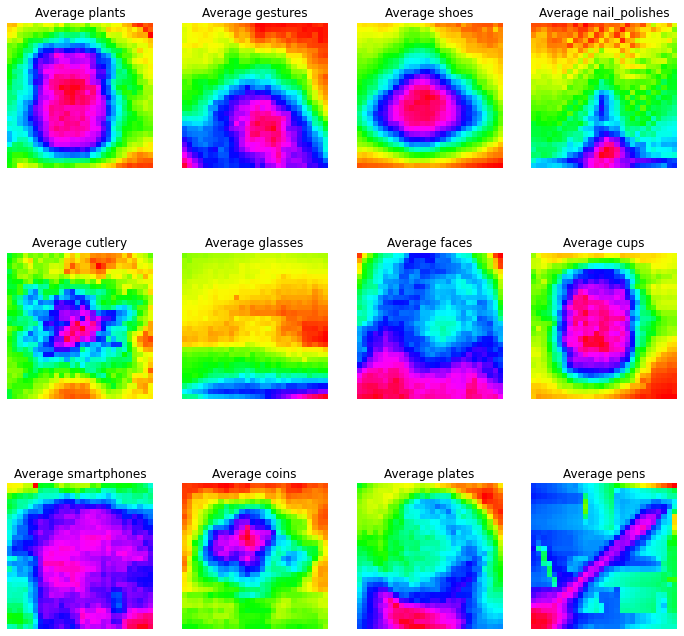

In [ ]:
#Creating a user defined function to calculate and plot the mean image of each category 
def find_mean_img(full_mat):
    mean_img = np.mean(full_mat, axis = 0)                                     # Taking the mean of pixel values for each category and storing in mean_img
    mean_img = mean_img.reshape((28,28))                                     # Reshaping the image to 150x150
  
    return mean_img

CATEGORIES=y_train['Label'].unique()                                           # Storing all the unique labels
d={ i:[] for i in CATEGORIES}                                                  # Here we are creating a dictionary with keys as unique categories and values as list for each category

for i in y_train.index:
  img = cv2.resize(X_train[i],(28,28))                                       # Reshaping the image to 28x28
  d[y_train['Label'][i]].append(img)                                           # Here we are appending each image of its category to its respective list in the dictionary

mean_img_list=[]
for i in d.keys():                                                             # Looping over each category from the keys in the dictionary and appeding the mean image of each category to the newly created list(mean_img_list)
  mean_img_list.append(find_mean_img(d[i]))

plt.subplots(figsize=(12,12))
for i in range(len(mean_img_list)):
    plt.subplot(3,4,i + 1,title='Average '+list(d.keys())[i])
    plt.imshow(mean_img_list[i], cmap='hsv_r')                                 # Here we are getting the image in different color to understand the difference between the mean image of all the 4 categories using cmap = hsv_r
    plt.axis('off')

In [ ]:
## Normalizing the image data 
X_train= X_train/255.0
X_test = X_test/255.0

In [ ]:
from sklearn.preprocessing import LabelBinarizer
# Storing the LabelBinarizer function in lb variable
lb = LabelBinarizer() 
# Applying fit_transform on train target variable
y_train_e = lb.fit_transform(y_train)
# Applying only transform on test target variable
y_test_e = lb.transform(y_test)

In [ ]:
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Defining the model
def create_model(): 
        # we will be adding the layers sequentially
        model_ann = keras.Sequential([
            # flattening the 3-d output of the conv layer and making it ready for creating dense connections
            keras.layers.Flatten(input_shape=(28,28,1)), 
            # first hidden layer with 500 neurons, kernel_initializer as 'he_uniform" and relu activation function
            keras.layers.Dense(500,kernel_initializer='he_uniform', activation=tf.nn.relu), 
            # second hidden layer with 700 neurons, kernel_initializer as 'he_uniform" and relu activation function
            keras.layers.Dense(700,kernel_initializer='he_uniform', activation=tf.nn.relu),
            # output layer with 4 neuron and softmax as activation function will give the probability of each class   
            keras.layers.Dense(12, kernel_initializer='random_uniform',activation=tf.nn.softmax)
        ])
        # Once we are done with the model architecture, we need to compile the model, where we need to provide the loss function that 
        # we want to optimize, the optimization algorithm, and the evaluation metric that we are interested in to evaluate the model.
        model_ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model_ann

In [ ]:
## Applying the function created above model_ann
model_ann=create_model()
model_ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 500)               392500    
                                                                 
 dense_4 (Dense)             (None, 700)               350700    
                                                                 
 dense_5 (Dense)             (None, 12)                8412      
                                                                 
Total params: 751,612
Trainable params: 751,612
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Train the model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model with epochs of 200, batch_size of 64 with a validation split of 0% and storing the metrics in history variable
history=model_ann.fit(X_train, y_train_e,  epochs=200, batch_size=64,validation_split=0.20,callbacks=[es, mc])

Epoch 1/200
 1/16 [>.............................] - ETA: 40s - loss: 2.7713 - accuracy: 0.0625
Epoch 1: val_accuracy improved from -inf to 0.27126, saving model to best_model.h5
16/16 [==============================] - 3s 16ms/step - loss: 2.3405 - accuracy: 0.1986 - val_loss: 2.1183 - val_accuracy: 0.2713
Epoch 2/200
 1/16 [>.............................] - ETA: 0s - loss: 2.0511 - accuracy: 0.2969
Epoch 2: val_accuracy improved from 0.27126 to 0.36437, saving model to best_model.h5
16/16 [==============================] - 0s 6ms/step - loss: 1.8820 - accuracy: 0.3708 - val_loss: 1.7662 - val_accuracy: 0.3644
Epoch 3/200
 1/16 [>.............................] - ETA: 0s - loss: 1.7860 - accuracy: 0.3750
Epoch 3: val_accuracy improved from 0.36437 to 0.45749, saving model to best_model.h5
16/16 [==============================] - 0s 7ms/step - loss: 1.6139 - accuracy: 0.4316 - val_loss: 1.6225 - val_accuracy: 0.4575
Epoch 4/200
 1/16 [>.............................] - ETA: 0s - loss: 1.

In [ ]:
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
from tensorflow.keras.layers import MaxPool2D

In [ ]:
# initialized a sequential model
model_2 = Sequential()

# adding first conv layer with 256 filters and kernel size 5x5 , with ReLU activation and padding 'same' provides the output size same as the input size
#input_shape denotes input image dimension of images
model_2.add(Conv2D(filters = 256, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,3)))  # Shape of the image given to the model

# adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting
model_2.add(Dropout(0.25))

#  adding second conv layer with 128 filters and with kernel size 3x3 and ReLu activation function
model_2.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling havinf pool_size and strides with (2,2) to reduce the size of output of second conv layer
model_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting
model_2.add(Dropout(0.25))

#  adding third conv layer with 128 filters and with kernel size 3x3 and ReLu activation function
model_2.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling havinf pool_size and strides with (2,2) to reduce the size of output of third conv layer
model_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model_2.add(Dropout(0.3))

# adding fourth conv layer with 128 filters and with kernel size 2x2 and ReLu activation function
model_2.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
# adding max pooling havinf pool_size and strides with (2,2) to reduce the size of output of fourth conv layer
model_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model_2.add(Dropout(0.3))

# flattening the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
model_2.add(Flatten())
# adding a fully connected dense layer with 1024 neurons 
model_2.add(Dense(1024, activation = "relu"))
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
model_2.add(Dropout(0.5))
# adding the output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem.
model_2.add(Dense(12, activation = "softmax"))

In [ ]:
model_2=create_model()
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 2352)              0         
                                                                 
 dense_5 (Dense)             (None, 500)               1176500   
                                                                 
 dense_6 (Dense)             (None, 700)               350700    
                                                                 
 dense_7 (Dense)             (None, 12)                8412      
                                                                 
Total params: 1,535,612
Trainable params: 1,535,612
Non-trainable params: 0
_________________________________________________________________
